In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Problem 1a

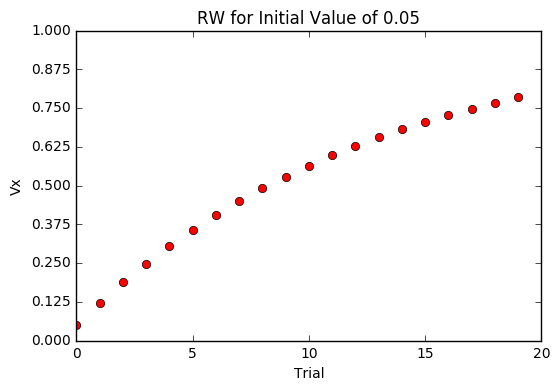

In [2]:
def rw(salience, learning, max_asc, list_o_asc):
    return salience * learning * (max_asc - np.sum(list_o_asc))
def rw_extinction(salience, learning, list_o_asc):
    return salience * learning * (0 - np.sum(list_o_asc))

delta = 1
alpha = 0.75
beta = .1
initial = .05
asc_list = [initial]
x_range = range(20)
y_range = [initial]

for i in range(19):
    curr_rw = rw(alpha, beta, delta, asc_list)
    asc_list.append(curr_rw)
    y_range.append(sum(asc_list))
    
plt.plot(x_range, y_range, "ro")
plt.title("RW for Initial Value of 0.05")
plt.yticks(np.linspace(0, 1, 9))
plt.xlabel("Trial")
plt.ylabel("Vx")

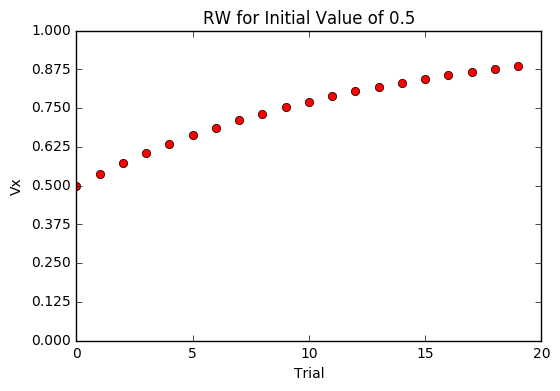

In [3]:
initial = .5
asc_list = [initial]
x_range = range(20)
y_range = [initial]

for i in range(19):
    curr_rw = rw(alpha, beta, delta, asc_list)
    asc_list.append(curr_rw)
    y_range.append(sum(asc_list))
    
plt.plot(x_range, y_range, "ro")
plt.title("RW for Initial Value of 0.5")
plt.yticks(np.linspace(0, 1, 9))
plt.xlabel("Trial")
plt.ylabel("Vx")

# Problem 1b

In [4]:
initial = .05
asc_list = [initial]
x_range = range(50)
y_range = [initial]

for i in range(49):
    curr_rw = rw(alpha, beta, delta, asc_list)
    asc_list.append(curr_rw)
    y_range.append(sum(asc_list))

dict_o_v = dict(zip(x_range, y_range))
for i in [19, 20, 21]:
    print("Trial #" + str(i) + " is " + str(dict_o_v[i]))

Trial #19 is 0.784018512786
Trial #20 is 0.800217124327
Trial #21 is 0.815200840002


<b>Trial #20 is when V_light becomes 0.8</b>

# Problem 1c

In [5]:
delta = 1
beta = .1
alpha = 0
vx = 0
vxpoint8 = False

while not vxpoint8:
    for i in range(13):
        vx += rw(alpha, beta, delta, vx)
    if vx >= 0.8:
        vxpoint8 = True
    else:
        vx = 0
        alpha += .001
print(alpha)

1.1649999999999825


<b> Salience must be 1.16 for V to reach 0.8 by 13 trials </b>

# Problem 2

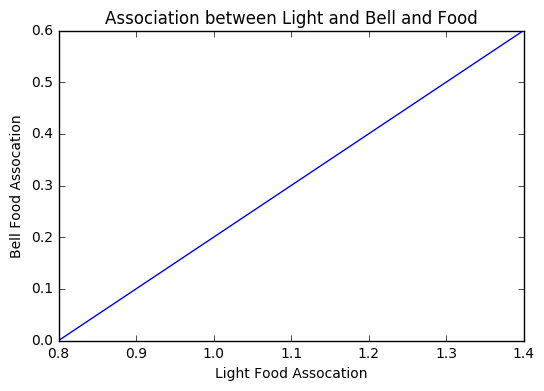

In [9]:
vlightfood = 0.8
vbellfood = 0
delta = 2
alpha = 0.75
beta = .1

lflist = [0.8]
bflist = [0]

for i in range(100):
    currv = rw(alpha, beta, delta, [vlightfood, vbellfood])
    vlightfood += currv
    vbellfood += currv
    lflist.append(vlightfood)
    bflist.append(vbellfood)
plt.plot(lflist, bflist)   
plt.xlabel("Light Food Assocation")
plt.ylabel("Bell Food Assocation")
plt.title("Association between Light and Bell and Food")

# Problem 3a

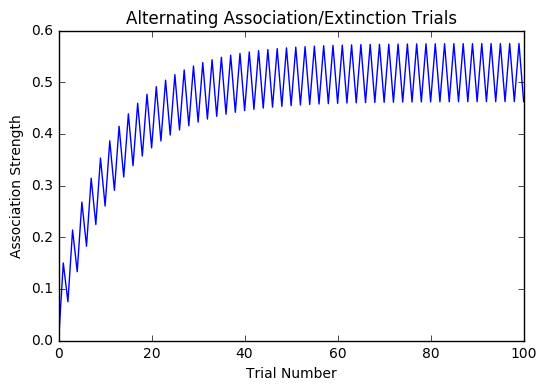

In [7]:
delta = 1
alpha = 0.75
beta = .1
asc_list = [0]
plot_list = [0]

for i in range(50):
    rw_app = rw(alpha, beta, delta, asc_list)
    rwex_app = rw_extinction(alpha, beta, asc_list)
    asc_list.append(rw_app)
    plot_list.append(sum(asc_list) + rw_app)
    asc_list.append(rwex_app)
    plot_list.append(sum(asc_list) + rwex_app)

plt.plot(range(101), plot_list)
plt.xlabel("Trial Number")
plt.ylabel("Association Strength")
plt.title("Alternating Association/Extinction Trials")

<b> With alternating trials, it makes sense that an association would still form between the bell and food, even with the gaps in learning. Everytime the bell is rung with no food, there would obviously be a dip in association strength, but the next trial would only serve to reinforce the association with bell and food, until we reach a max association strength of about 0.57 <b>

# Problem 3b

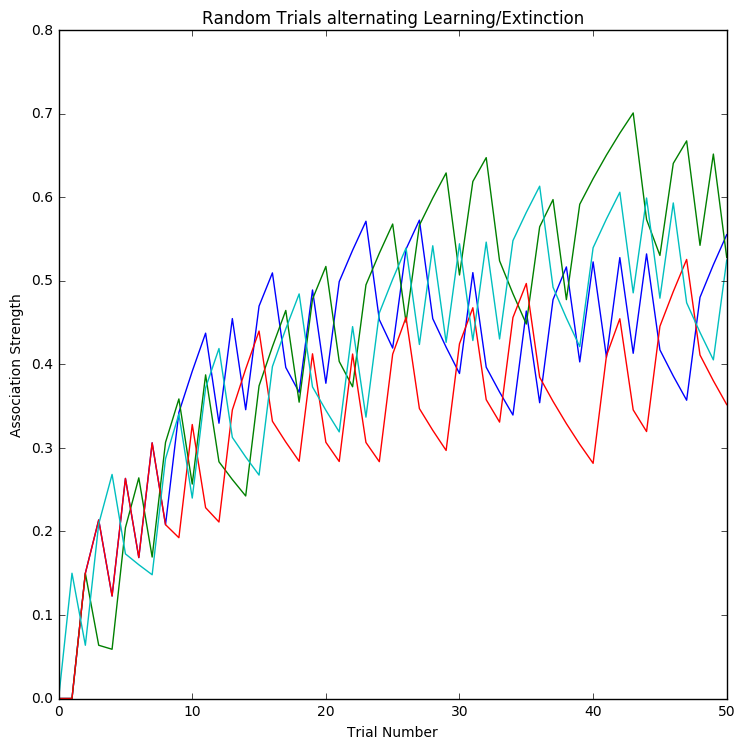

In [8]:
delta = 1
alpha = 0.75
beta = .1
fig = plt.figure(figsize = (50, 50))

for r in range(4):
    asc_list = [0]
    plot_list = [0]
    for i in range(50):
        rand = np.random.random()
        rw_app = rw(alpha, beta, delta, asc_list)
        rwex_app = rw_extinction(alpha, beta, asc_list)
        if rand >= 0.5:
            asc_list.append(rw_app)
            plot_list.append(sum(asc_list) + rw_app)
        else:
            asc_list.append(rwex_app)
            plot_list.append(sum(asc_list) + rwex_app)

    ax = fig.add_subplot(5,5,1)
    ax.plot(range(51), plot_list)
ax.set_title("Random Trials alternating Learning/Extinction")  
ax.set_xlabel("Trial Number")
ax.set_ylabel("Association Strength")

<b>Analyzing this model on Marr's computational level, one might make this to show that even with random learning/extinction events, the association strength still tends to grow upwards. </B>

# Problem 4

<b> Psychologically and semantically speaking, we likely believe that salience and learning rates are two different things because salience represents the strength of the stimulus itself (brightness of a light, for example) whilst the learning rate represents the ability of that light to influence the association rate. An experiment to disentangle salience and learning rate could involve a series of experiments where everything is kept the same but different subjects are used, as salience would be exactly the same in these experiments (under ideal lab conditions), but the learning rates would be different (because these would be different per experimentee), causing different assocation strengths with same saliences. </b>